# **Árboles de Decisión.**



Para nuestro modelo de clasificación, vamos a usar los datos del árbolado público de la Ciudad de Buenos Aires. El dataset ha sido acondicionado previamente por nosotros para que resulte más fácil para ejercicio. El dataset original (y completo) lo pueden encontrar aquí: https://data.buenosaires.gob.ar/dataset/arbolado-publico-lineal

### **Importamos las librerías y cargamos los datos.**

In [ ]:
# Vamos a importar pandas y scikit-learn, que ya usamos para regresión y nos va a servir también para clasificación
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#el nuevo módulo que importamos es "tree" para tener modelos de árboles de decisión
from sklearn import tree

In [ ]:
# Variable string que vamos a utilizar como argumento a la hora de extraer nuestro dataset. 
arbolado_caba = "https://raw.githubusercontent.com/RacoFernandez/python-ciencias-sociales/main/clase-vii/arbolado-caba.csv"

Ahora procedemos a leer la tabla con el método *read_csv()*.

In [ ]:
# Como en la clase anterior, vamos a trabajar con un csv, en este caso posteado en github, indicamos que el separador es una coma y el encoding UTF-8
data = pd.read_csv(arbolado_caba, sep=",", encoding='utf-8')

### **Primer vistazo a la** *data*.

In [ ]:
#Vamos a ver los datos imprimiendo el objeto
data

,altura_tot,diametro,inclinacio,origen,barrio,comuna,fres_am
0,8,33,0,Exótico,VILLA SOLDATI,8,no
1,5,22,0,Exótico,BARRACAS,4,si
2,13,39,0,Exótico,CHACARITA,15,no
3,9,24,7,Exótico,VELEZ SARSFIELD,10,no
4,12,78,0,Exótico,VILLA CRESPO,15,no
...,...,...,...,...,...,...,...
9995,9,35,0,Exótico,CABALLITO,6,si
9996,6,8,0,Exótico,VERSALLES,10,no
9997,6,14,0,Exótico,VERSALLES,10,si
9998,6,9,0,Nativo/Autóctono,BOEDO,5,no


In [ ]:
# Vemos la cantidad de filas y columnas que tienen nuestros datos
print("La base tiene",data.shape[0],"filas")
print("La base tiene",data.shape[1],"columnas")

La base tiene 10000 filas
La base tiene 7 columnas


In [ ]:
#Confirmo que no haya valores nulos en mi dataset, una de las condiciones de la regresión lineal
data.isnull().values.any()

False

In [ ]:
data=data.replace({'fres_am' : { 'si' : 1, 'no' : 0}})
data

,altura_tot,diametro,inclinacio,origen,barrio,comuna,fres_am
0,8,33,0,Exótico,VILLA SOLDATI,8,0
1,5,22,0,Exótico,BARRACAS,4,1
2,13,39,0,Exótico,CHACARITA,15,0
3,9,24,7,Exótico,VELEZ SARSFIELD,10,0
4,12,78,0,Exótico,VILLA CRESPO,15,0
...,...,...,...,...,...,...,...
9995,9,35,0,Exótico,CABALLITO,6,1
9996,6,8,0,Exótico,VERSALLES,10,0
9997,6,14,0,Exótico,VERSALLES,10,1
9998,6,9,0,Nativo/Autóctono,BOEDO,5,0


In [ ]:
data=pd.get_dummies(data)
data

,altura_tot,diametro,inclinacio,comuna,fres_am,origen_Exótico,origen_Nativo/Autóctono,origen_No Determinado,barrio_AGRONOMIA,barrio_ALMAGRO,barrio_BALVANERA,barrio_BARRACAS,barrio_BELGRANO,barrio_BOCA,barrio_BOEDO,barrio_CABALLITO,barrio_CHACARITA,barrio_COGHLAN,barrio_COLEGIALES,barrio_CONSTITUCION,barrio_Dique 1,barrio_Dique 3,barrio_FLORES,barrio_FLORESTA,barrio_LINIERS,barrio_MATADEROS,barrio_MONSERRAT,barrio_MONTE CASTRO,barrio_NUEVA POMPEYA,barrio_NUÑEZ,barrio_PALERMO,barrio_PARQUE AVELLANEDA,barrio_PARQUE CHACABUCO,barrio_PARQUE CHAS,barrio_PARQUE PATRICIOS,barrio_PATERNAL,barrio_PUERTO MADERO,barrio_RECOLETA,barrio_RETIRO,barrio_SAAVEDRA,barrio_SAN CRISTOBAL,barrio_SAN NICOLAS,barrio_SAN TELMO,barrio_VELEZ SARSFIELD,barrio_VERSALLES,barrio_VILLA CRESPO,barrio_VILLA DEL PARQUE,barrio_VILLA DEVOTO,barrio_VILLA GRAL. MITRE,barrio_VILLA LUGANO,barrio_VILLA LURO,barrio_VILLA ORTUZAR,barrio_VILLA PUEYRREDON,barrio_VILLA REAL,barrio_VILLA RIACHUELO,barrio_VILLA SANTA RITA,barrio_VILLA SOLDATI,barrio_VILLA URQUIZA
0,8,33,0,8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,5,22,0,4,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,13,39,0,15,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,24,7,10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,12,78,0,15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9,35,0,6,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9996,6,8,0,10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9997,6,14,0,10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9998,6,9,0,5,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### **Separamos nuestro dataset entre conjuntos de entrenamiento y testeo.**

1.   Generamos unas X (variables predictoras) y una Y (variable dependiente o a predecir)
2.   Hacemos una separación entre train y test para cada una (mismas filas)



In [ ]:
#1.
#Nuestra "Y" va a ser si el árbol es un fresno americano o no
arbolado_Y = pd.DataFrame(data['fres_am'])
#Genero un dataset con mis variables predictoras
arbolado_X =pd.DataFrame(data.drop('fres_am', axis=1))

In [ ]:
#2.
#Separo entre entrenamiento y test tanto mis X como mi Y
arbolado_x_train, arbolado_x_test, arbolado_y_train, arbolado_y_test = train_test_split(
    arbolado_X, arbolado_Y, test_size=0.3, random_state=42)

In [ ]:
#Vemos que entre train y test se mantuvo una proporcion de 70-30
print("arbolado_x_train tiene",arbolado_x_train.shape[0],"filas")
print("arbolado_x_train tiene",arbolado_x_train.shape[1],"columnas")
print("arbolado_x_test tiene",arbolado_x_test.shape[0],"filas")
print("arbolado_x_test tiene",arbolado_x_test.shape[1],"columnas")
print("arbolado_y_train tiene",arbolado_y_train.shape[0],"filas")
print("arbolado_y_train tiene",arbolado_y_train.shape[1],"columnas")
print("arbolado_y_test tiene",arbolado_y_test.shape[0],"filas")
print("arbolado_y_test tiene",arbolado_y_test.shape[1],"columnas")

arbolado_x_train tiene 7000 filas
arbolado_x_train tiene 57 columnas
arbolado_x_test tiene 3000 filas
arbolado_x_test tiene 57 columnas
arbolado_y_train tiene 7000 filas
arbolado_y_train tiene 1 columnas
arbolado_y_test tiene 3000 filas
arbolado_y_test tiene 1 columnas


### **Cargo el modelo a utilizar y lo entreno.**


In [ ]:
#Cargamos el modelo de clasificador de árbol de decisión que nos brinda scikit-learn
modelo_arbol = tree.DecisionTreeClassifier()

In [ ]:
#Entreno el modelo, tengo que pasar mis datos de entrenamiento X e Y
modelo_arbol.fit(arbolado_x_train, arbolado_y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### **Grafico mi árbol de decisión.**


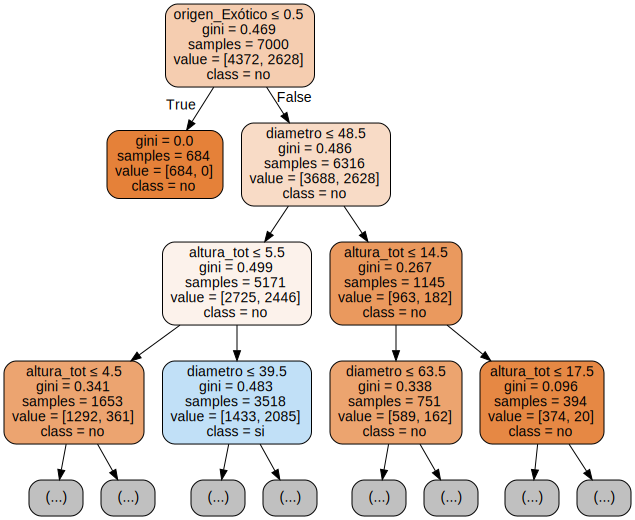

In [ ]:
import graphviz
dot_data = tree.export_graphviz(modelo_arbol, out_file=None, 
                      feature_names=arbolado_x_train.columns,  
                      class_names=["no", "si"],  
                      filled=True, rounded=True,  
                      special_characters=True, max_depth=3)  
graph = graphviz.Source(dot_data)  
graph 

### **Genero las predicciones.**


In [ ]:
arbolado_y_pred = modelo_arbol.predict(arbolado_x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error
print(confusion_matrix(arbolado_y_test, arbolado_y_pred))
print(classification_report(arbolado_y_test, arbolado_y_pred))
print(accuracy_score(arbolado_y_test, arbolado_y_pred))
print('Mean Absolute Error:', mean_absolute_error(arbolado_y_test, arbolado_y_pred))
print('Mean Squared Error:', mean_squared_error(arbolado_y_test, arbolado_y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(arbolado_y_test, arbolado_y_pred)))

[[1362  459]
 [ 540  639]]
              precision    recall  f1-score   support

           0       0.72      0.75      0.73      1821
           1       0.58      0.54      0.56      1179

    accuracy                           0.67      3000
   macro avg       0.65      0.64      0.65      3000
weighted avg       0.66      0.67      0.66      3000

0.667
Mean Absolute Error: 0.333
Mean Squared Error: 0.333
Root Mean Squared Error: 0.5770615218501404


### **Random Forest.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
modelo_arbol_2 = RandomForestClassifier(n_estimators=20, random_state=0)
modelo_arbol_2.fit(arbolado_x_train, arbolado_y_train)
arbolado_y_pred_2 = modelo_arbol_2.predict(arbolado_x_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print(confusion_matrix(arbolado_y_test,arbolado_y_pred_2))
print(classification_report(arbolado_y_test,arbolado_y_pred_2))
print(accuracy_score(arbolado_y_test, arbolado_y_pred_2))
print('Mean Absolute Error:', mean_absolute_error(arbolado_y_test, arbolado_y_pred_2))
print('Mean Squared Error:', mean_squared_error(arbolado_y_test, arbolado_y_pred_2))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(arbolado_y_test, arbolado_y_pred_2)))

[[1423  398]
 [ 502  677]]
              precision    recall  f1-score   support

           0       0.74      0.78      0.76      1821
           1       0.63      0.57      0.60      1179

    accuracy                           0.70      3000
   macro avg       0.68      0.68      0.68      3000
weighted avg       0.70      0.70      0.70      3000

0.7
Mean Absolute Error: 0.3
Mean Squared Error: 0.3
Root Mean Squared Error: 0.5477225575051661


In [ ]:
modelo_arbol_2.feature_importances_

array([2.69222850e-01, 4.28318175e-01, 7.49254216e-02, 3.81059658e-02,
       2.60448353e-02, 3.81326181e-02, 5.05182506e-03, 1.78125462e-03,
       2.20550236e-03, 2.11371390e-03, 2.32666280e-03, 3.29954968e-03,
       2.30161552e-03, 1.32339796e-03, 2.80814547e-03, 2.21125043e-03,
       2.16646871e-03, 2.76334354e-03, 2.72061306e-03, 0.00000000e+00,
       1.21665001e-04, 2.90353142e-03, 2.64582615e-03, 3.12322928e-03,
       4.34610287e-03, 6.86701685e-04, 2.53927950e-03, 2.11730287e-03,
       3.15664822e-03, 3.24241201e-03, 3.16312941e-03, 2.08260316e-03,
       2.22657073e-03, 2.15259267e-03, 2.49089473e-03, 2.05553916e-03,
       1.40352490e-03, 2.78980301e-03, 4.03106263e-03, 3.09528989e-03,
       4.10710657e-04, 8.27355049e-04, 2.71746183e-03, 2.08652179e-03,
       2.71563835e-03, 2.29015943e-03, 3.12461229e-03, 2.33341652e-03,
       3.07467290e-03, 3.00575472e-03, 2.10869632e-03, 3.23475928e-03,
       3.10670429e-03, 2.47997018e-03, 2.20513200e-03, 2.53591583e-03,
      

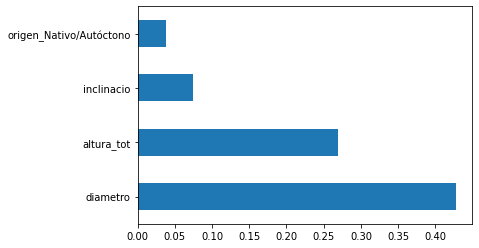

In [ ]:
#Puedo ver las variables más importantes para mi random forest
(pd.Series(modelo_arbol_2.feature_importances_, index=arbolado_x_train.columns)
   .nlargest(4)
   .plot(kind='barh')) 